참고 : https://wikidocs.net/20919

## 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/songhunhwa/songhunhwa.github.com/master/tutorial/tutorial_01/doc_use_log.csv')
df.head(2)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime
0,OPEN,False,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18
1,CLOSE,False,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18


In [2]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=5326004348a0f51713ed80607d5a83a4af9e78312a4a3bd07987222f0ad2fa1f
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [3]:
from pandasql import * 

# sql 언어 활용을 위한 라이브러리, 쿼리 작성
q = "SELECT * FROM df WHERE ext = 'PDF' AND ismydoc = '0' LIMIT 10"
print ( sqldf(q, locals()).to_string())

  actiontype  ismydoc  ext                         sessionid documentposition   datetime
0       OPEN        0  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE  2016.7.18
1      CLOSE        0  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE  2016.7.18
2       OPEN        0  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   2016.7.6
3      CLOSE        0  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP  2016.7.20
4       OPEN        0  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP  2016.7.20
5       OPEN        0  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP  2016.7.28
6      CLOSE        0  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP  2016.7.28
7       OPEN        0  PDF  9e37751e132b5eb96e7d3fde7db132e3         OTHERAPP  2016.7.19
8      CLOSE        0  PDF  9e37751e132b5eb96e7d3fde7db132e3         OTHERAPP  2016.7.19
9       OPEN        0  PDF  202c847b75c9920eb51337b1d5181e10         OTHERAPP  2016.7.24


In [4]:
# sql group by를 이용한 집계처리
q = """ SELECT ext, count(ext) as count, count(distinct sessionid) as unq_sess
        FROM df
        GROUP BY ext
        ORDER BY count DESC"""
print ( sqldf(q, locals()).to_string())

      ext  count  unq_sess
0     PDF  82004     37404
1    DOCX  58303     24842
2    XLSX  52118     23448
3     HWP  26244     11266
4     DOC  24586     11174
5     XLS  24489     11208
6    PPTX  15385      7053
7     TXT   9814      4569
8     PPT   5382      2596
9    PPSX   2374      1212
10    ODT    820       375
11    PPS    324       153
12    JPG      9         9
13  SHEET      5         3
14    PNG      2         2
15   WORD      2         1


In [5]:
# 테이블 조인
ios = pd.read_csv('https://raw.githubusercontent.com/songhunhwa/songhunhwa.github.com/master/tutorial/tutorial_01/ios.csv')

q = """
    SELECT A.*, B.flag
    FROM df A
    LEFT JOIN ( SELECT sessionid, flag FROM ios) B
    ON A.sessionid = B.sessionid
    WHERE B.flag = 'iOS'
    """

print(sqldf(q,locals()).to_string())

    actiontype  ismydoc   ext                         sessionid documentposition   datetime flag
0        CLOSE        1   PDF  b8a35b63d65e36fcbcf7284db362fa06   MYPOLARISDRIVE  2016.7.29  iOS
1         OPEN        1   PDF  b8a35b63d65e36fcbcf7284db362fa06   MYPOLARISDRIVE  2016.7.29  iOS
2        CLOSE        0   PDF  ab9ea758f63a61463efa059c7183b976         OTHERAPP  2016.7.29  iOS
3         OPEN        0   PDF  ab9ea758f63a61463efa059c7183b976         OTHERAPP  2016.7.29  iOS
4        CLOSE        0   PDF  401e95152f65bcd9573bb1707967e82a         OTHERAPP  2016.7.17  iOS
5         OPEN        0   PDF  401e95152f65bcd9573bb1707967e82a         OTHERAPP  2016.7.17  iOS
6        CLOSE        0   PDF  7891c7016850ccca28b54b3f8f0c554e         OTHERAPP  2016.7.25  iOS
7         OPEN        0   PDF  7891c7016850ccca28b54b3f8f0c554e         OTHERAPP  2016.7.25  iOS
8        CLOSE        1   HWP  dd16321402b19a3f20261e6905e4e9bf         OTHERAPP  2016.7.12  iOS
9         OPEN        1   HWP 

## 라이브러리

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/songhunhwa/songhunhwa.github.com/master/tutorial/tutorial_02/df_funnel.csv')

In [25]:
df.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


## 전처리
* 데이터 타입 변환  
* 데이터 값 변경  
* 결측치 처리  
* 신규 세션 아이디 부여  
* 대소문자 처리

### 날짜를 pandas dataframe 형태로 변환

In [26]:
# if datetime is string? no sort 
df.groupby("datetime").size().head(15)

datetime
2016.7.1     11836
2016.7.10     6750
2016.7.11    10075
2016.7.12    12340
2016.7.13    12159
2016.7.14    11721
2016.7.15    11057
2016.7.16     8513
2016.7.17     6906
2016.7.18     9987
2016.7.19    11872
2016.7.2      8884
2016.7.20    11912
2016.7.21    11599
2016.7.22    11250
dtype: int64

In [27]:
## case 1. if date type is string,
str_date = ['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05'] # string type
str_date

['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05']

In [28]:
pd.to_datetime(str_date) # parsed

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq=None)

In [29]:
pd.Series(pd.to_datetime(str_date)) # to pd.series

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
dtype: datetime64[ns]

In [30]:
## case 2. 날짜가 timestamp인 경우
ts_date = [1349720105, 1349806505, 1349892905, 1349979305, 1350065705]
ts_date

[1349720105, 1349806505, 1349892905, 1349979305, 1350065705]

In [31]:
pd.Series(pd.to_datetime([1530837876, 1530751476, 1530665076, 1530578676, 1530492276], unit='s')).dt.date

0    2018-07-06
1    2018-07-05
2    2018-07-04
3    2018-07-03
4    2018-07-02
dtype: object

In [32]:
## case 3. 컬럼 타입만 바꾸는 경우
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301861 entries, 0 to 301860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        301861 non-null  int64 
 1   actiontype        301861 non-null  object
 2   ismydoc           301861 non-null  object
 3   ext               301861 non-null  object
 4   sessionid         301861 non-null  object
 5   documentposition  301861 non-null  object
 6   datetime          301861 non-null  object
 7   screen            301861 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.4+ MB


In [33]:
df.head() # object = string

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [34]:
# option1. string to datetime
df['datetime'].astype('datetime64[ns]').head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [35]:
# option2.
pd.to_datetime(df['datetime']).head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [36]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301861 entries, 0 to 301860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        301861 non-null  int64         
 1   actiontype        301861 non-null  object        
 2   ismydoc           301861 non-null  object        
 3   ext               301861 non-null  object        
 4   sessionid         301861 non-null  object        
 5   documentposition  301861 non-null  object        
 6   datetime          301861 non-null  datetime64[ns]
 7   screen            301861 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 18.4+ MB


In [37]:
df.groupby("datetime").size()#.plot()

datetime
2016-07-01    11836
2016-07-02     8884
2016-07-03     6334
2016-07-04     9260
2016-07-05    10988
2016-07-06    10525
2016-07-07    10153
2016-07-08    10522
2016-07-09     8283
2016-07-10     6750
2016-07-11    10075
2016-07-12    12340
2016-07-13    12159
2016-07-14    11721
2016-07-15    11057
2016-07-16     8513
2016-07-17     6906
2016-07-18     9987
2016-07-19    11872
2016-07-20    11912
2016-07-21    11599
2016-07-22    11250
2016-07-23     8390
2016-07-24     6813
2016-07-25    10081
2016-07-26    12034
2016-07-27    11593
2016-07-28    11216
2016-07-29    10721
2016-07-30     8087
dtype: int64

In [38]:
# day to year
df['datetime'].dt.year[:10]

0    2016
1    2016
2    2016
3    2016
4    2016
5    2016
6    2016
7    2016
8    2016
9    2016
Name: datetime, dtype: int64

In [39]:
# day to month
df['datetime'].dt.month[:10]

0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
8    7
9    7
Name: datetime, dtype: int64

In [40]:
# day to day
df['datetime'].dt.day[:10]

0    18
1    18
2    18
3    18
4     6
5     6
6    20
7    20
8    28
9    28
Name: datetime, dtype: int64

### 결측값 처리

* Drop  
경우에 따라 결측치 처리 방법이 달라진다.  
샘플수가 많다면 missing values 를 포함하는 행을 모두 삭제하는 것이 가능
* Imputation  
만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다.  
연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 예측 모형을 통해 Null 값을 대체할 수 있다

In [41]:
df.isnull().sum()

Unnamed: 0          0
actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dtype: int64

In [42]:
df_by_screen = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack()

df_by_screen[:10]

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,NaN,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [43]:
df_by_screen.isnull().sum()

screen
InProduct_Mob    0
InProduct_Web    0
Main             0
Per_Dir          0
Pub_Dir          0
Purchase_done    6
Purchase_page    0
dtype: int64

In [44]:
df_by_screen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InProduct_Mob  30 non-null     float64
 1   InProduct_Web  30 non-null     float64
 2   Main           30 non-null     float64
 3   Per_Dir        30 non-null     float64
 4   Pub_Dir        30 non-null     float64
 5   Purchase_done  24 non-null     float64
 6   Purchase_page  30 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


In [45]:
# 비즈니스 목적 및 맥락을 바탕으로 판단하건대, 
# 결측치를 0으로 처리하는 것이 적당하다고 판단됨
df_by_screen.fillna(0)[:10]

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,0.0,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,0.0,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,0.0,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [46]:
# dropna with 'how' param
df_by_screen.dropna(how='any')[:10] # how='all' or 'any'

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0
2016-07-10,62.0,122.0,1872.0,230.0,636.0,2.0,18.0
2016-07-12,138.0,157.0,3646.0,371.0,1000.0,4.0,26.0
2016-07-13,132.0,172.0,3544.0,334.0,988.0,1.0,35.0


In [47]:
# select ony rows, including NaN
df_by_screen[df_by_screen.isnull().any(axis=1)]

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,NaN,18.0
2016-07-11,125.0,139.0,2944.0,332.0,801.0,NaN,26.0
2016-07-18,133.0,162.0,2882.0,317.0,841.0,NaN,30.0
2016-07-19,124.0,137.0,3552.0,331.0,934.0,NaN,24.0


In [48]:
# fill NaN with median
df_by_screen.fillna(df_by_screen.median())[:10] # mean, max, min ..

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,2.0,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,2.0,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,2.0,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [55]:
df_ms = df.copy() # it helps to test any code or functions

# ix대신 loc를 써야함
df_ms.loc[2, 'documentposition'] = np.nan
df_ms.loc[5, 'documentposition'] = np.nan
df_ms.loc[7, 'documentposition'] = np.nan
df_ms.loc[10, 'documentposition'] = np.nan
df_ms.loc[11, 'documentposition'] = np.nan
df_ms.loc[15, 'documentposition'] = np.nan

df_ms.head(10)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main
6,6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main
8,8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main
9,9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main


In [50]:
# frequency table
df_ms.documentposition.value_counts()

OTHERAPP          213779
MYPOLARISDRIVE     55520
LOCALSTORAGE       18922
NEWDOCUMENT         7612
NONE                4335
OTHERCLOUD          1617
SHAREDDOCUMENT        76
Name: documentposition, dtype: int64

In [51]:
# fillna with most frequent value (MODE)
freq_values = df_ms.documentposition.value_counts().index[0]

freq_values

'OTHERAPP'

In [52]:
df_ms['documentposition'] = df_ms['documentposition'].fillna(freq_values)
df_ms.head(10)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
6,6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main
8,8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main
9,9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main


In [57]:
# let's use a machine learning model to deal with nulls
df_ms.loc[2, 'documentposition'] = np.nan
df_ms.loc[5, 'documentposition'] = np.nan
df_ms.loc[7, 'documentposition'] = np.nan
df_ms.loc[10, 'documentposition'] = np.nan
df_ms.loc[11, 'documentposition'] = np.nan
df_ms.loc[15, 'documentposition'] = np.nan

df_ms.head(10)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main
6,6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main
8,8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main
9,9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main


In [58]:
# fill na using predictive model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# train without na
df_ms1 = df_ms.dropna()

# set independent cols
ind_cols = ['actiontype', 'ismydoc', 'ext', 'screen']

# split ind, tar
X = df_ms1[ind_cols]
y = df_ms1[['documentposition']]

In [59]:
# 독립변수
X.head(10)

,actiontype,ismydoc,ext,screen
0,OPEN,NoView,PDF,Per_Dir
1,CLOSE,NoView,PDF,Per_Dir
3,CLOSE,View,PDF,Pub_Dir
4,OPEN,NoView,PDF,Main
6,CLOSE,NoView,PDF,Main
8,OPEN,NoView,PDF,Main
9,CLOSE,NoView,PDF,Main
12,CLOSE,NoView,PDF,Main
13,RESET,View,PDF,Main
14,OPEN,View,PDF,Pub_Dir


In [60]:
# 종속변수
y[:10]

,documentposition
0,LOCALSTORAGE
1,LOCALSTORAGE
3,MYPOLARISDRIVE
4,OTHERAPP
6,OTHERAPP
8,OTHERAPP
9,OTHERAPP
12,OTHERAPP
13,OTHERAPP
14,MYPOLARISDRIVE


In [61]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X = X.apply(lambda x: encoder.fit_transform(x))
y = y.apply(lambda y: encoder.fit_transform(y))

X.head(10)

,actiontype,ismydoc,ext,screen
0,3,0,5,3
1,0,0,5,3
3,0,1,5,4
4,3,0,5,2
6,0,0,5,2
8,3,0,5,2
9,0,0,5,2
12,0,0,5,2
13,4,1,5,2
14,3,1,5,4


In [62]:
y[:10]

,documentposition
0,0
1,0
3,1
4,4
6,4
8,4
9,4
12,4
13,4
14,1


In [63]:
## the cross validation phase
# X: df_ms_ind / y: df_ms_tar

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

print(X.shape)
print(y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(301855, 4)
(301855, 1)
(226391, 4) (226391, 1)
(75464, 4) (75464, 1)


### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

knn

KNeighborsClassifier()

In [65]:
print(knn.score(X_train, y_train))

0.9999072401288037


In [66]:
print(knn.score(X_test, y_test))

0.9998409837803456


In [67]:
knn_pred = knn.predict(X_test)
knn_pred[:20]

array([1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 2, 4, 1, 4, 0, 4, 1, 4, 4])

In [68]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, knn_pred))

[[ 4736     0     0     0     0     0     0]
 [    3 13894     0     0     0     0     0]
 [    0     0  1920     0     3     0     0]
 [    0     0     1  1085     1     0     0]
 [    0     0     1     0 53384     0     0]
 [    0     0     0     0     0   414     0]
 [    0     2     0     0     0     1    19]]


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4736
           1       1.00      1.00      1.00     13897
           2       1.00      1.00      1.00      1923
           3       1.00      1.00      1.00      1087
           4       1.00      1.00      1.00     53385
           5       1.00      1.00      1.00       414
           6       1.00      0.86      0.93        22

    accuracy                           1.00     75464
   macro avg       1.00      0.98      0.99     75464
weighted avg       1.00      1.00      1.00     75464



In [70]:
pd.Series(knn_pred).value_counts().sort_index()

0     4739
1    13896
2     1922
3     1085
4    53388
5      415
6       19
dtype: int64

In [71]:
class_cd = pd.Series(encoder.classes_).to_dict()

class_cd

{0: 'LOCALSTORAGE',
 1: 'MYPOLARISDRIVE',
 2: 'NEWDOCUMENT',
 3: 'NONE',
 4: 'OTHERAPP',
 5: 'OTHERCLOUD',
 6: 'SHAREDDOCUMENT'}

In [72]:
# let's impute the null values with the knn predictive model
df_ms.head(10)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main
6,6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main
8,8,OPEN,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main
9,9,CLOSE,NoView,PDF,3da5ab986c93803de1e25012d9972274,OTHERAPP,2016-07-28,Main


In [73]:
df_ms.isnull().sum()

Unnamed: 0          0
actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    6
datetime            0
screen              0
dtype: int64

In [74]:
df_ms_only = df_ms[df_ms.isnull().any(axis=1)]

df_ms_only

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NaN,2016-07-18,Pub_Dir
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NaN,2016-07-06,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NaN,2016-07-20,Main
10,10,OPEN,View,PDF,3da5ab986c93803de1e25012d9972274,NaN,2016-07-28,Main
11,11,OPEN,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,NaN,2016-07-19,Main
15,15,CLOSE,View,PDF,450e74586e6a05f2983905205e8f8cb1,NaN,2016-07-24,Pub_Dir


In [75]:
df_ms_dropna = df_ms.dropna()

df_ms_dropna.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
6,6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main


In [76]:
# predict missing categorical vars

knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

array([2, 2, 3, 3, 3, 3])

In [77]:
class_cd

{0: 'LOCALSTORAGE',
 1: 'MYPOLARISDRIVE',
 2: 'NEWDOCUMENT',
 3: 'NONE',
 4: 'OTHERAPP',
 5: 'OTHERCLOUD',
 6: 'SHAREDDOCUMENT'}

In [78]:
fill_na_values = knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

fill_na_values

array([2, 2, 3, 3, 3, 3])

In [79]:
df_ms_only['documentposition'] = fill_na_values

df_ms_only.head(5)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,2,2016-07-18,Pub_Dir
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,2,2016-07-06,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,3,2016-07-20,Main
10,10,OPEN,View,PDF,3da5ab986c93803de1e25012d9972274,3,2016-07-28,Main
11,11,OPEN,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,3,2016-07-19,Main


In [80]:
df_ms_only['documentposition'] = df_ms_only['documentposition'].replace(class_cd)

df_ms_only.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,NEWDOCUMENT,2016-07-18,Pub_Dir
5,5,RESET,View,PDF,f191063c562691041dfa935ff0876975,NEWDOCUMENT,2016-07-06,Main
7,7,OPEN,NoView,PDF,3747719d8f6bdd334703320433928d5a,NONE,2016-07-20,Main
10,10,OPEN,View,PDF,3da5ab986c93803de1e25012d9972274,NONE,2016-07-28,Main
11,11,OPEN,NoView,PDF,9e37751e132b5eb96e7d3fde7db132e3,NONE,2016-07-19,Main


In [81]:
df_ms_final = pd.concat([df_ms_dropna, df_ms_only], axis=0)

df_ms_final.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main
6,6,CLOSE,NoView,PDF,3747719d8f6bdd334703320433928d5a,OTHERAPP,2016-07-20,Main


In [82]:
df_ms_final.isnull().sum()

Unnamed: 0          0
actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dtype: int64

### 확장자명 통일

In [83]:
df.ext.value_counts()

PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: ext, dtype: int64

In [84]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

df['ext'] = df['ext'].replace(ext_dic)
df['ext'].value_counts()

DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: ext, dtype: int64

### Action type 통일

In [85]:
df.actiontype.value_counts()

OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: actiontype, dtype: int64

In [86]:
act_dic = {'SAVEAS': 'SAVE',
           'SAVEAS_OTHER': 'SAVE',
           'EXPORT_SAME': 'EXPORT'
            }

df['actiontype'] = df['actiontype'].replace(act_dic)
df['actiontype'].value_counts()

OPEN      151802
CLOSE     127922
SAVE       14299
RESET       7751
EXPORT        87
Name: actiontype, dtype: int64

### 신규 세션아이디 부여

In [88]:
s = [] # empty list
j = 0 # default setting

# loop
for i in range(len(df)-1):
    
    # compare each rows
    if df.loc[i, 'sessionid'] == df.loc[i+1, 'sessionid']:
        s.append(j)

    # update j values
    else:
        s.append(j)
        j += 1

s[:20]

[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7]

In [89]:
df['sessionid']  = pd.Series(['sess' + str(x) for x in s])
df.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
1,1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main


## EDA
* 일별 주요 통계  
* 변수별 특성  
* 구간별 전환율  
* 클러스터링  
* 클러스터별 전환율 차이 파악

### 일별 트렌드

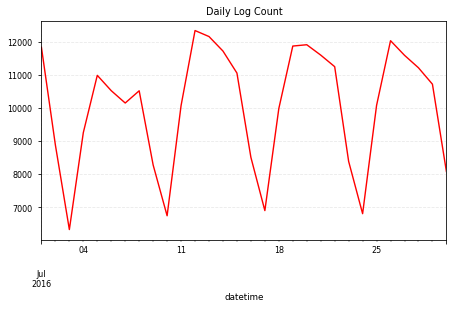

In [90]:
# daily log size
df.groupby("datetime").size().plot(c='r');

plt.title("Daily Log Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

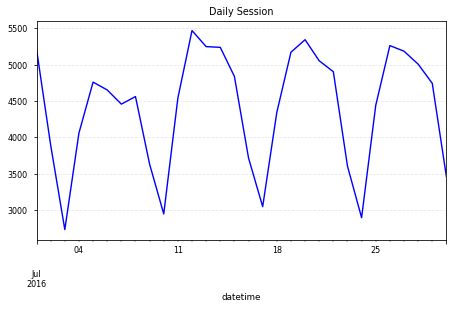

In [91]:
# daily session count => activness index
df.groupby("datetime")['sessionid'].nunique().plot(c='b');

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

앱 사용에 시즈널리티 존재  
로그수와 세션수의 트렌드가 유사함  


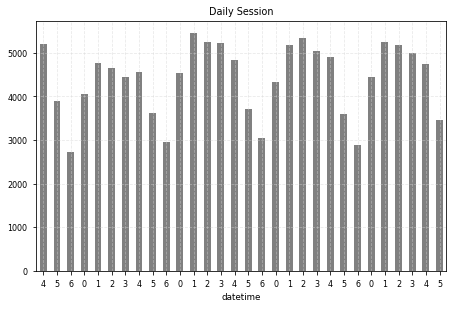

In [92]:
## daily session count (weekofday)
# 0: Monday, 6: Sunday

s = df.groupby("datetime")['sessionid'].nunique()
s.index = s.index.dayofweek

s.plot(color='grey', kind='bar', rot=0);

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

주말에 사용성이 매우 감소하고 주중 초반이 높은편  
문서앱이라는 특성상, 직장인 혹은 학생이 주로 사용할 것으로 가정하면 당연한 결과  


* 탐색 내용  
일별, 확장자별 로그수  
일별, 위치별 로그수  
일별, 액션별 로그수  
일별, 화면 스크린별 유니크 유저수

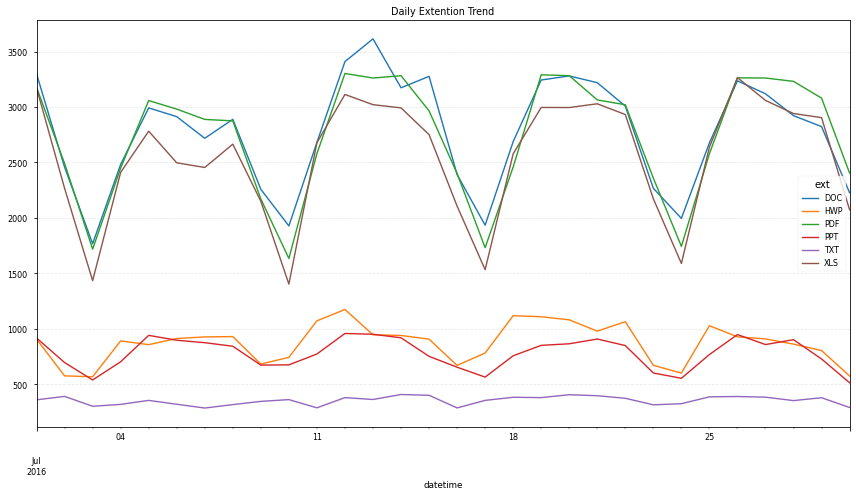

In [93]:
# daily trend by extention
df.groupby(["datetime", "ext"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily Extention Trend")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

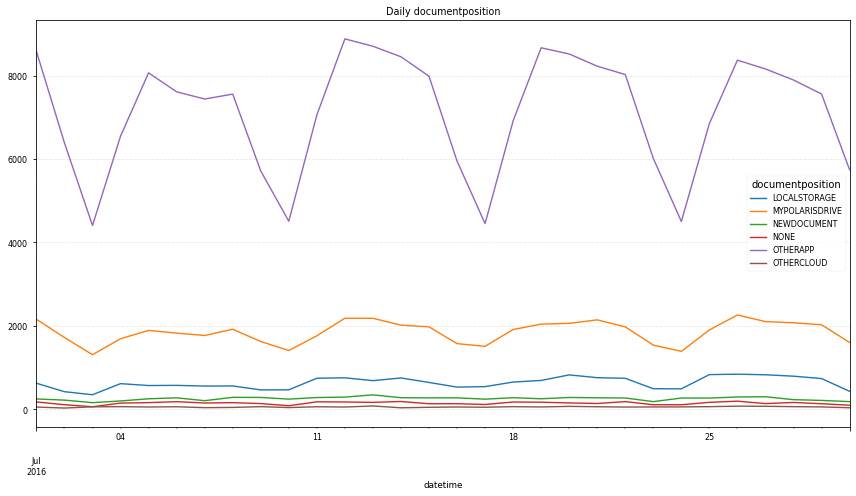

In [94]:
# daily trend by doc position
df.groupby(["datetime", "documentposition"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily documentposition")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

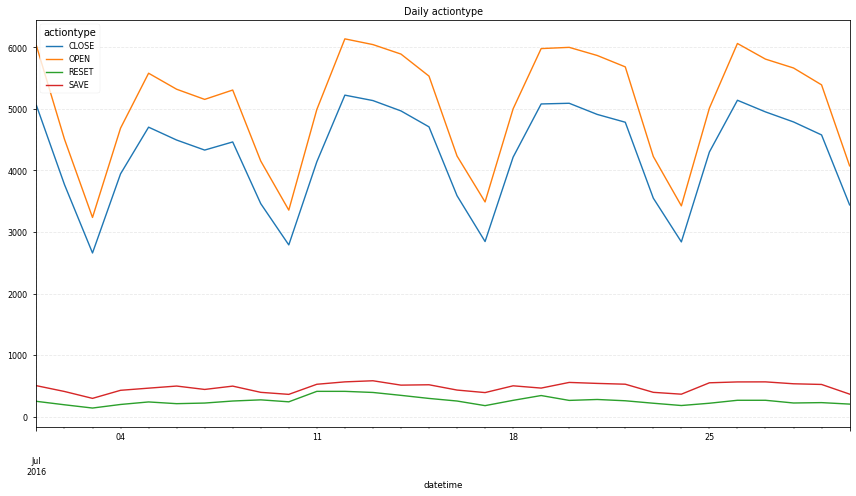

In [95]:
# daily trend by action type
df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily actiontype")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

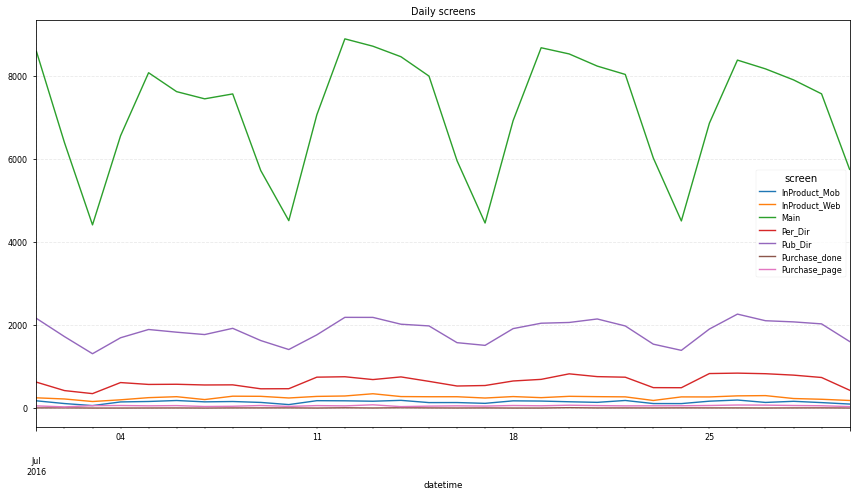

In [96]:
# daily trend by screen name
df.groupby(["datetime", "screen"]).size().unstack().fillna(0).astype(int).plot(figsize=(12,7));

plt.title("Daily screens")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [97]:
# heat map
screens = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack().fillna(0).astype(int)

# cols order change
screens = screens[screens.mean().sort_values(ascending=False).index]

screens[:5]

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1


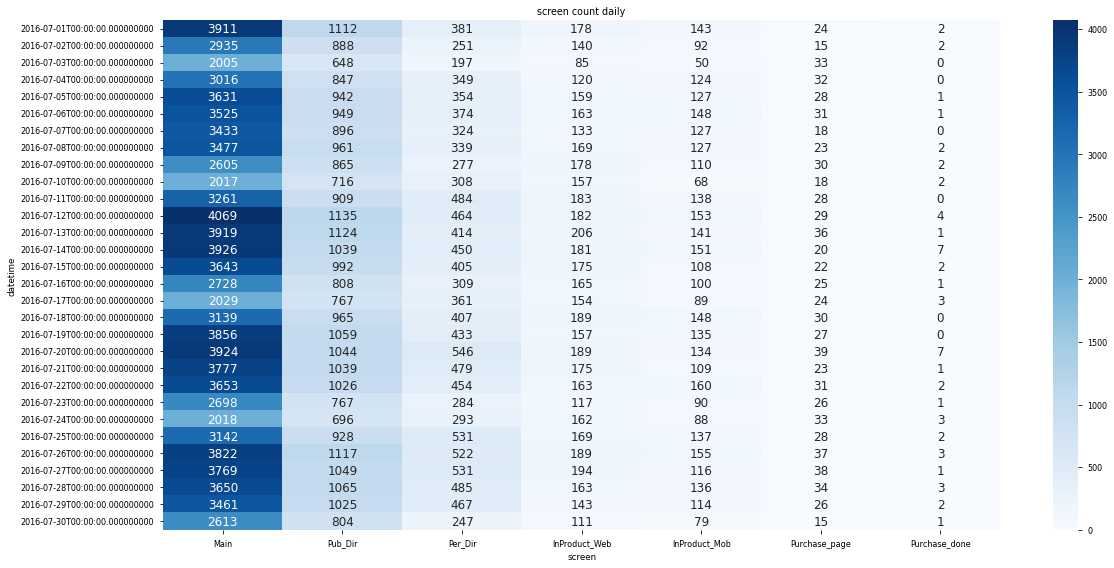

In [98]:
plt.subplots(figsize=(17,8))

sns.heatmap(screens, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues');

plt.title("screen count daily")
plt.tight_layout()

doc, pdf, xls 순으로 주로 사용  
주요 문서 이용 위치는 otherapp  
Main -> 구매완료(purchase_done) 까지 과정에서 대부분 이탈

### 피벗팅을 통한 변수별 특성 탐색
unstack, stack, pivot_table과 같은 함수를 이용해 다양한 각도에서의 데이터 탐색

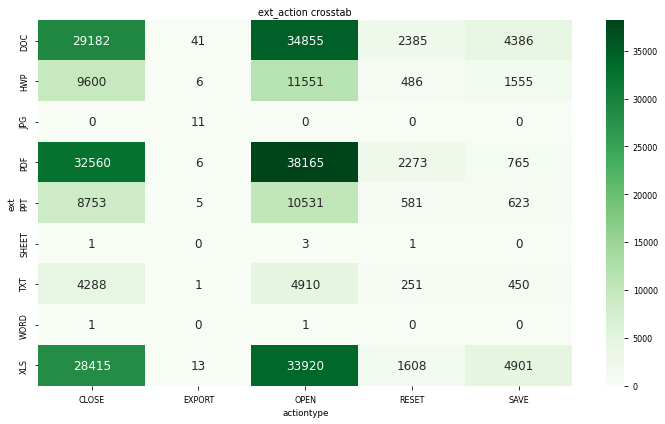

In [99]:
plt.subplots(figsize=(10,6))

ext_action = df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(ext_action, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Greens');

plt.title("ext_action crosstab")
plt.tight_layout()

In [100]:
# count to percent
df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).apply(lambda x: x/x.sum()*100).round(2)

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
ext,,,,,
DOC,25.87,49.40,26.02,31.44,34.59
HWP,8.51,7.23,8.62,6.41,12.26
JPG,0.00,13.25,0.00,0.00,0.00
PDF,28.87,7.23,28.49,29.97,6.03
PPT,7.76,6.02,7.86,7.66,4.91
SHEET,0.00,0.00,0.00,0.01,0.00
TXT,3.80,1.20,3.67,3.31,3.55
WORD,0.00,0.00,0.00,0.00,0.00
XLS,25.19,15.66,25.33,21.20,38.65


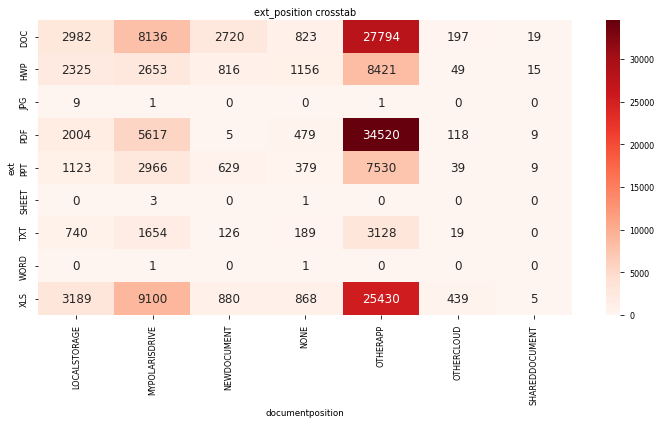

In [101]:
plt.subplots(figsize=(10,6))

ext_pos = df.groupby(["ext", "documentposition"])['sessionid'].nunique().unstack().fillna(0).astype(int)

sns.heatmap(ext_pos, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Reds');

plt.title("ext_position crosstab")
plt.tight_layout()

### 변수별 분포 및 상관관계

In [102]:
ext_by_session = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().dropna(how='all')

ext_by_session.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
sess1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
sess10,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
sess100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
sess1000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [103]:
pos_by_session = df.query("actiontype == 'OPEN'").groupby(['sessionid', 'documentposition']).size().unstack().dropna(how='all')

pos_by_session.head()

documentposition,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,
sess0,1.0,1.0,NaN,NaN,NaN,NaN
sess1,NaN,NaN,NaN,1.0,NaN,NaN
sess10,NaN,1.0,NaN,1.0,NaN,NaN
sess100,NaN,NaN,NaN,1.0,NaN,NaN
sess1000,NaN,NaN,NaN,1.0,NaN,NaN


In [104]:
# Join => sessionid becomes unique (primary key)
exp_pos = pd.concat([ext_by_session, pos_by_session], axis=1).fillna(0)

exp_pos.head()

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
exp_pos.describe().round(2)

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
count,120657.00,120657.00,120657.00,120657.00,120657.0,120657.00,120657.0,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00
mean,0.34,0.11,0.35,0.10,0.0,0.04,0.0,0.31,0.07,0.21,0.04,0.93,0.01,0.00
std,0.59,0.35,0.55,0.35,0.0,0.21,0.0,0.54,0.27,0.47,0.20,0.69,0.08,0.02
min,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,0.00,1.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00,1.00,0.00,0.00
max,6.00,6.00,4.00,5.00,1.0,4.00,1.0,7.00,5.00,7.00,4.00,9.00,4.00,2.00


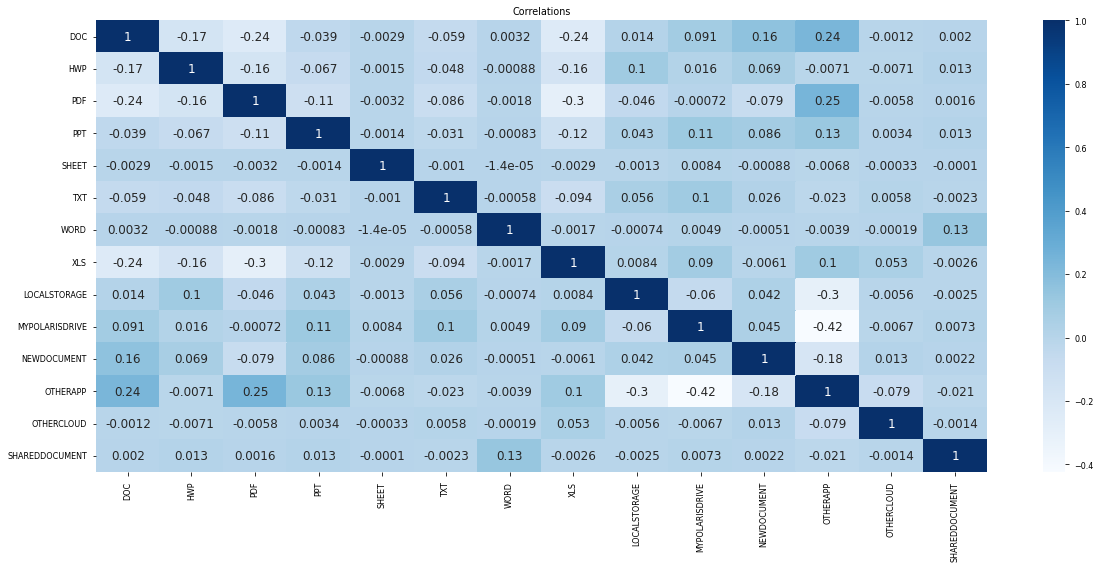

In [106]:
plt.subplots(figsize=(17,8))

sns.heatmap(exp_pos.corr(), annot=True, annot_kws={"size": 12}, cmap='Blues');

plt.title("Correlations")
plt.tight_layout()

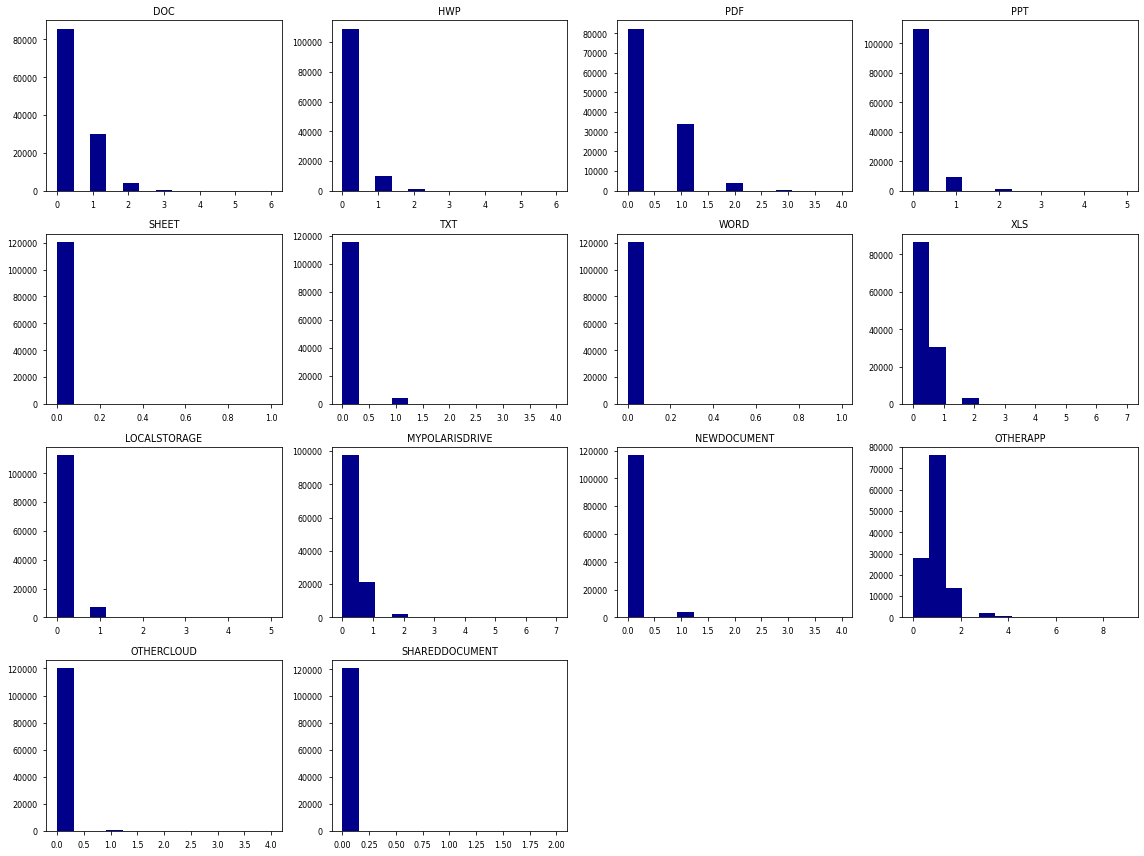

In [107]:
exp_pos.hist(bins=13, color='darkblue', figsize=(16,12), grid=False);

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 퍼널 데일리 트렌드

In [108]:
screens.head() # daily session count by screen

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1


In [109]:
# mean of each columns
conver_cnt = screens.mean().apply(lambda x: int(x)).sort_values(ascending=False)

conver_cnt

screen
Main             3255
Pub_Dir           939
Per_Dir           390
InProduct_Web     161
InProduct_Mob     119
Purchase_page      27
Purchase_done       1
dtype: int64

In [110]:
# average conversion rate
for i in range(len(conver_cnt)-1):
    print((conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2))

28.85
41.53
41.28
73.91
22.69
3.7


In [111]:
# another option for gettig average conversion rate
conver_rt = [(conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2) for i in range(len(conver_cnt)) if i < 6]

conver_rt

[28.85, 41.53, 41.28, 73.91, 22.69, 3.7]

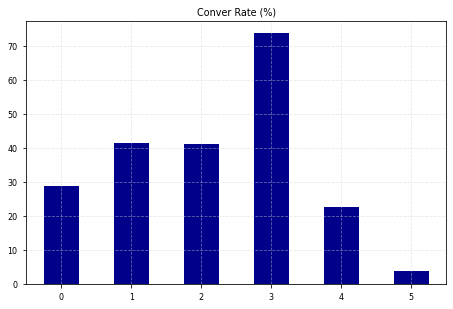

In [112]:
pd.Series(conver_rt).plot(kind='bar', color = 'darkblue', rot=0)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [113]:
# create x labels
fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 6]

fun_label

['Main > Pub_Dir',
 'Pub_Dir > Per_Dir',
 'Per_Dir > InProduct_Web',
 'InProduct_Web > InProduct_Mob',
 'InProduct_Mob > Purchase_page',
 'Purchase_page > Purchase_done']

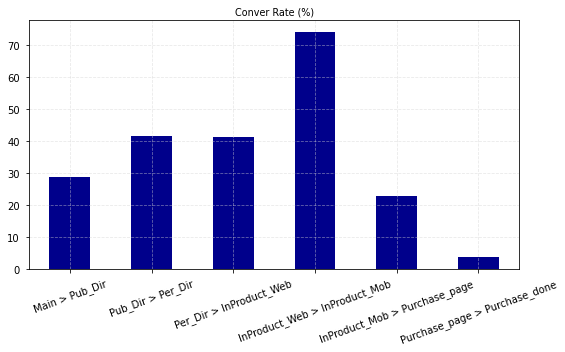

In [114]:
# with revised x labels
pd.Series(conver_rt, index=fun_label).plot(kind='bar', color = 'darkblue', rot=20, figsize=(8,5), fontsize=10)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

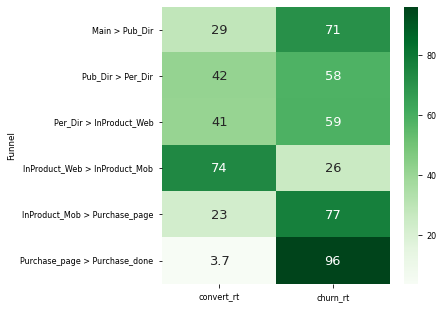

In [115]:
# another visualization
conv_rt_tb = pd.Series(conver_rt, index=fun_label).to_frame()
conv_rt_tb.index.name = 'Funnel'
conv_rt_tb.columns = ['convert_rt']
conv_rt_tb['churn_rt'] = 100 - conv_rt_tb['convert_rt']

sns.heatmap(conv_rt_tb, annot=True, annot_kws={"size": 13}, cmap='Greens');

plt.tight_layout()

### 중간 정리  
* 일별 주요 통계  
활성화 세션의 경우 주말에 감소, 주중에 증가하는 트렌드  
확장자별 1 tier에서는 pdf, xls, doc가 포지셔닝 되며, 2tier에는 hwp,ppt가 포함됨  
문서의 이용 위치는 'other app' 이 압도적으로 높음  
스크린별로 사용성 파악 결과, 메인(main) 화면이 가장 많이 노출되며 다음 화면(pub_dir or per_dir)으로 넘어가는 경우 많지 않음  

* 구간별 전환율  
전환율이 가장 낮은 구간(=이탈이 가장 높은 구간)은 구매정보 페이지에서 구매 완료 페이지로 전환하는 구간임(3.7%)  
제품내 웹 -> 앱으로 전환하는 구간은 전환율이 양호함(74%)

## 클러스터링 for targeting

In [116]:
# 확장자만 기준으로 group by sessionid 하여 클러스터링을 위한 전처리 진행
# Note) if 다른 변수가 같이 있다면 scaling 필수
df_ext = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().fillna(0)

df_ext.head(10)

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess100001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [117]:
df_ext_elbow = df_ext.copy()

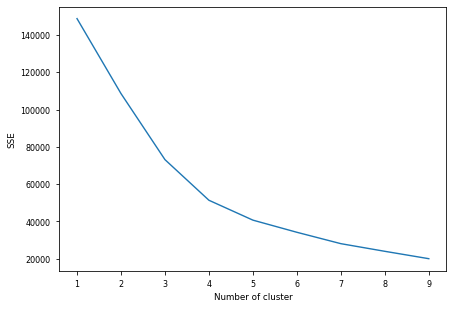

In [119]:
from sklearn.cluster import KMeans


# scree plot with sum of square error
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_ext_elbow)
    df_ext_elbow["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

In [120]:
km = KMeans(n_clusters=4).fit(df_ext)

labels = km.labels_
labels

array([1, 1, 3, ..., 2, 0, 1], dtype=int32)

In [121]:
df_ext['group'] = labels
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [122]:
df_ext.group.value_counts()

0    42334
1    36804
2    30122
3    11397
Name: group, dtype: int64

In [123]:
df_ext_mean = df_ext.groupby("group").mean().round(2)

df_ext_mean

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
group,,,,,,,,
0,0.04,0.00,0.01,0.21,0.0,0.10,0.0,0.84
1,0.08,0.00,1.12,0.03,0.0,0.01,0.0,0.04
2,1.20,0.00,0.02,0.07,0.0,0.02,0.0,0.02
3,0.02,1.13,0.04,0.02,0.0,0.01,0.0,0.02


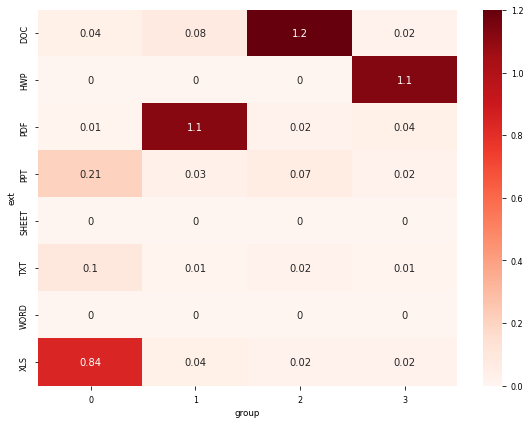

In [124]:
plt.subplots(figsize=(8,6))

sns.heatmap(df_ext_mean.T, annot=True, cmap='Reds')

plt.tight_layout()

In [125]:
# be careful with the values; the group no. changes randomly
group_name = {0: 'gr_hwp',
              1: 'gr_pdf',
              2: 'gr_doc',
              3: 'gr_xls'}

In [126]:
df_ext['group'] = df_ext['group'].replace(group_name)
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,gr_pdf
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_pdf
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,gr_xls
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gr_hwp
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_pdf


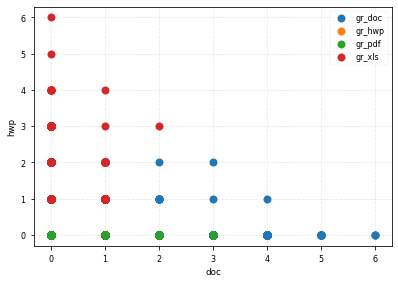

In [128]:
groups = df_ext.groupby("group")

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['DOC'], group['HWP'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("doc")
plt.ylabel("hwp")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

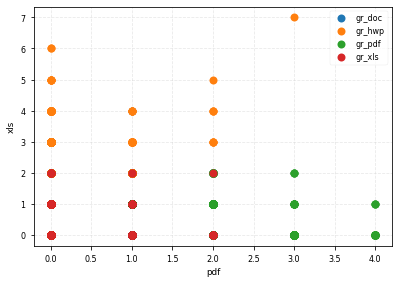

In [129]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PDF'], group['XLS'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("pdf")
plt.ylabel("xls")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

### 클러스터별 전환율

In [130]:
df_open = df.query("actiontype == 'OPEN'")

df_open.head(10)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main
7,7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main
8,8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main
10,10,OPEN,View,PDF,sess3,OTHERAPP,2016-07-28,Main
11,11,OPEN,NoView,PDF,sess4,OTHERAPP,2016-07-19,Main
14,14,OPEN,View,PDF,sess5,MYPOLARISDRIVE,2016-07-24,Pub_Dir
16,16,OPEN,NoView,PDF,sess6,OTHERAPP,2016-07-24,Main
18,18,OPEN,NoView,HWP,sess7,OTHERAPP,2016-07-11,Main


In [131]:
df_ext.group.head()

sessionid
sess0       gr_pdf
sess1       gr_pdf
sess10      gr_xls
sess100     gr_hwp
sess1000    gr_pdf
Name: group, dtype: object

In [132]:
df_cluster = df_open.merge(df_ext[['group']].reset_index(), on='sessionid', how='left')

df_cluster.head(10)

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,group
0,0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,gr_pdf
1,2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,gr_pdf
2,4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,gr_pdf
3,7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,gr_pdf
4,8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,gr_pdf
5,10,OPEN,View,PDF,sess3,OTHERAPP,2016-07-28,Main,gr_pdf
6,11,OPEN,NoView,PDF,sess4,OTHERAPP,2016-07-19,Main,gr_pdf
7,14,OPEN,View,PDF,sess5,MYPOLARISDRIVE,2016-07-24,Pub_Dir,gr_pdf
8,16,OPEN,NoView,PDF,sess6,OTHERAPP,2016-07-24,Main,gr_pdf
9,18,OPEN,NoView,HWP,sess7,OTHERAPP,2016-07-11,Main,gr_xls


In [133]:
#define a function to get conversion rates
def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]\
                     .groupby(["datetime", "screen"])['sessionid']\
                     .nunique().unstack().fillna(0).astype(int)
            
    conver_cnt = df_gr_screen.mean().apply(lambda x: int(x)).sort_values(ascending=False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100 for i in range(len(conver_cnt)) if i < 5]
    fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 5]
    conver_rt = pd.Series(conver_rt, index=fun_label).fillna(0)
    
    return conver_rt

In [134]:
conv_rt_pdf = conv_rt_by_grp('gr_pdf')

conv_rt_pdf

Main > Pub_Dir                   15.858209
Pub_Dir > Per_Dir                28.823529
Per_Dir > InProduct_Web          12.244898
InProduct_Web > Purchase_page    50.000000
Purchase_page > Purchase_done     0.000000
dtype: float64

In [135]:
conv_rt_doc = conv_rt_by_grp('gr_doc')
conv_rt_doc

Main > Pub_Dir                   24.643320
Pub_Dir > InProduct_Web          35.263158
InProduct_Web > Per_Dir          88.059701
Per_Dir > Purchase_page           3.389831
Purchase_page > Purchase_done     0.000000
dtype: float64

In [136]:
conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_xls

Main > Pub_Dir                   26.515152
Pub_Dir > Per_Dir                75.714286
Per_Dir > InProduct_Web          37.735849
InProduct_Web > Purchase_done     0.000000
Purchase_done > Purchase_page     0.000000
dtype: float64

In [137]:
conv_rt_hwp = conv_rt_by_grp('gr_hwp')
conv_rt_hwp

Main > Pub_Dir                   34.486267
Pub_Dir > Per_Dir                30.678466
Per_Dir > InProduct_Web          35.576923
InProduct_Web > Purchase_page    32.432432
Purchase_page > Purchase_done     0.000000
dtype: float64

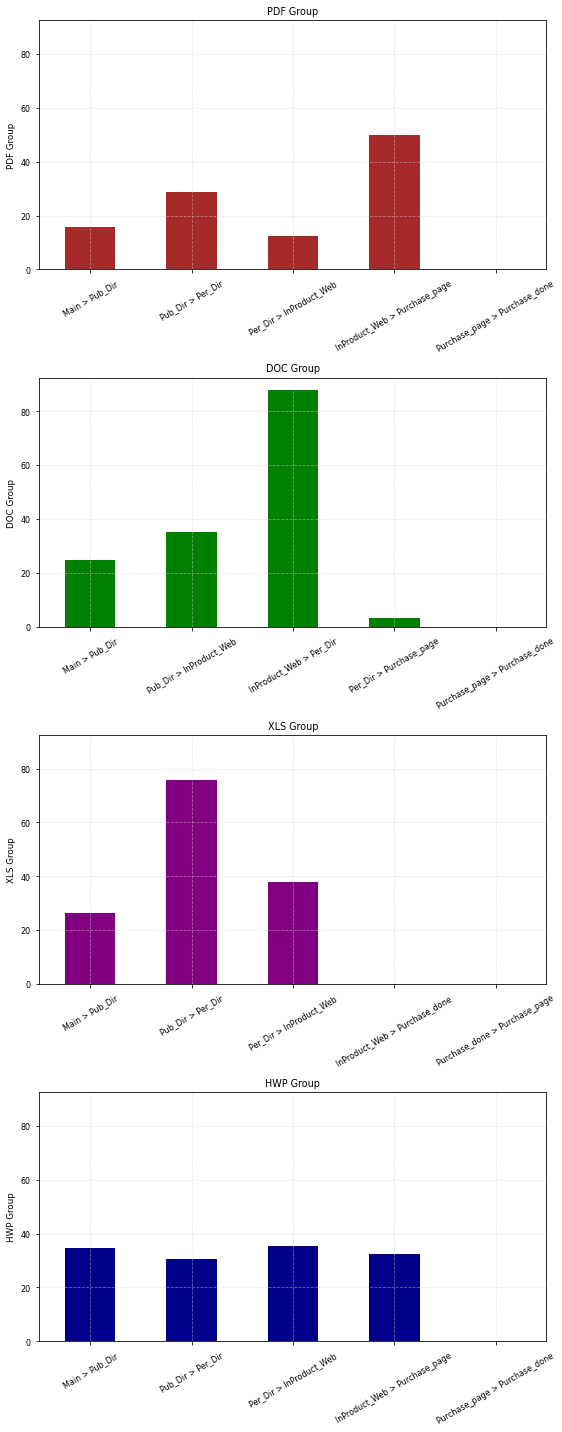

In [138]:
fig, ax = plt.subplots(4, 1, figsize=(8,20), sharey=True)

conv_rt_pdf.plot(kind='bar', ax=ax[0], color = 'brown', rot=30)
ax[0].set_title('PDF Group')
ax[0].set_ylabel('PDF Group')
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_doc.plot(kind='bar', ax=ax[1], color = 'green', rot=30)
ax[1].set_ylabel('DOC Group')
ax[1].set_title('DOC Group')
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_xls.plot(kind='bar', ax=ax[2], color = 'purple', rot=30)
ax[2].set_ylabel('XLS Group')
ax[2].set_title('XLS Group')
ax[2].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_hwp.plot(kind='bar', ax=ax[3], color = 'darkblue', rot=30)
ax[3].set_ylabel('HWP Group')
ax[3].set_title('HWP Group')
ax[3].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

In [139]:
# 그룹별 평균 전환율
gr_pdf_avg = conv_rt_pdf.replace(0, np.nan).mean()
gr_doc_avg = conv_rt_doc.replace(0, np.nan).mean()
gr_xls_avg = conv_rt_xls.replace(0, np.nan).mean()
gr_hwp_avg = conv_rt_hwp.replace(0, np.nan).mean()

print("pdf", gr_pdf_avg)
print("doc", gr_doc_avg)
print("xls", gr_xls_avg)
print("hwp", gr_hwp_avg)

pdf 26.731659081543064
doc 37.83900256472836
xls 46.65509542868033
hwp 33.29352202926979


In [140]:
print(conv_rt_pdf)

Main > Pub_Dir                   15.858209
Pub_Dir > Per_Dir                28.823529
Per_Dir > InProduct_Web          12.244898
InProduct_Web > Purchase_page    50.000000
Purchase_page > Purchase_done     0.000000
dtype: float64


In [141]:
# 가중치 임의 설정
weights = [1, 1.3, 1.5, 2, 2.5]

# 가중 평균
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg

In [142]:
gr_pdf_w = weight_avg(conv_rt_pdf)
gr_doc_w = weight_avg(conv_rt_doc)
gr_xls_w = weight_avg(conv_rt_xls)
gr_hwp_w = weight_avg(conv_rt_hwp)

print("pdf:", gr_pdf_w)
print("doc:", gr_doc_w)
print("xls:", gr_xls_w)
print("hwp:", gr_hwp_w)

pdf: 34.3392288258587
doc: 41.87092777641554
xls: 36.30949930572572
hwp: 38.519704382196394


In [143]:
avg_df = pd.DataFrame(list(zip([gr_pdf_avg, gr_doc_avg, gr_xls_avg, gr_hwp_avg],\
                                   [gr_pdf_w, gr_doc_w, gr_xls_w, gr_hwp_w])), \
                                   columns = ['mean', 'wg_mean'],\
                                   index = ['gr_pdf', 'gr_doc', 'gr_xls', 'gr_hwp'])

avg_df

,mean,wg_mean
gr_pdf,26.731659,34.339229
gr_doc,37.839003,41.870928
gr_xls,46.655095,36.309499
gr_hwp,33.293522,38.519704


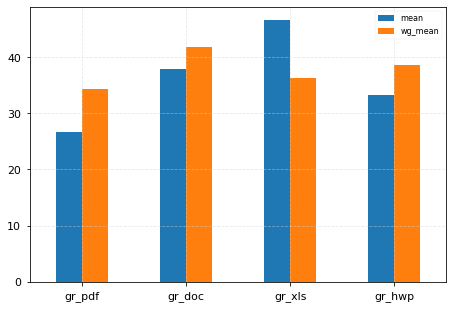

In [144]:
avg_df.plot(kind='bar', fontsize=11, rot=0)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()